# Abstract:
Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

# Source UCI Machine Repository:
Murat KOKLU
Faculty of Technology,
Selcuk University,
TURKEY.
ORCID : 0000-0002-2737-2360
mkoklu@selcuk.edu.tr

# Classification Task of Coffee Beans
Attribute Information:
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area. 

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12.)Compactness (CO): Measures the roundness of an object: Ed/L

13.)ShapeFactor1 (SF1)

14.)ShapeFactor2 (SF2)

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira) 

Step1:-Importing libraries

In [72]:
import numpy as np
import pandas as pd
import sklearn
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix,classification_report

Step 2:-Reading Dataset

In [ ]:
dataset=pd.read_excel("/content/Dry_Bean_Dataset.xlsx")

# Analysing the dataset , no values are found missing in dataset
print(dataset.tail())
print(dataset.tail())
print(dataset.info())
print(dataset.describe())
print(dataset.sample(frac=.3))

Step 3 :Pre-Processing

In [ ]:
# Separating the dependent and independent variables into X(independent) and y(dependent)
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Checking the number of labels in classification values, Dataset is little imbalance in labels
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

**Splitting the data into train and test dataset and Performing Scaling**






In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=56,test_size=.2,stratify=y)

In [ ]:
# checking shape of data
print(X_train.shape)
# print(np.asarray((np.unique(y_test,return_counts=True))).T)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# **Building a Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier(random_state=32)
decisiontree.fit(X_train,y_train)

In [ ]:
pred_value=decisiontree.predict(X_test)
print(pred_value)

In [ ]:
print( f'\033[1m \033[91m Accuracy score is {round( accuracy_score(y_test,pred_value),3)}')
print(f'\033[1m \033[91m Precision Score is {round(precision_score(y_test,pred_value,average="weighted"),3)}')

In [97]:
print(f'\033[1m \033[94m Confusion Matrix \n')
df_confusion=confusion_matrix(y_test,pred_value)
print(df_confusion)

  Confusion Matrix 

[[242   0  13   1   2   0   7]
 [  0 104   0   0   0   0   0]
 [ 19   0 297   0   9   1   0]
 [  0   0   0 629   6  10  64]
 [  2   0  12   3 358   0  11]
 [  1   0   0  16   0 373  16]
 [  5   0   3  49  15  12 443]]


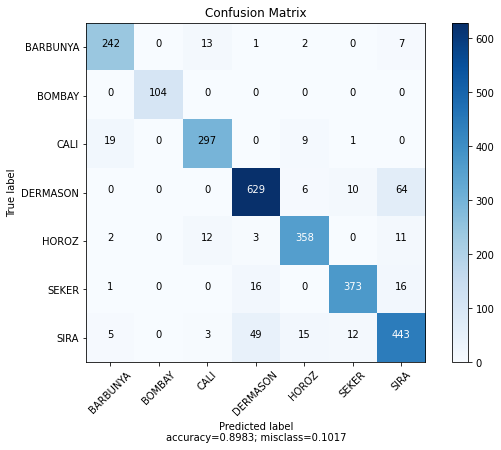

In [98]:
# code taken from sklearn learn library
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm=df_confusion, normalize=False ,               
                          target_names =['BARBUNYA' ,'BOMBAY' ,'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],       # list of names of the classes
                          title        = "Confusion Matrix",cmap=plt.cm.Blues)




# **We will now try and build a K-Nearest Neighbour classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KnnClasifier=KNeighborsClassifier(n_neighbors=5,random_state=42)
KnnClasifier.fit(X_train,y_train)

In [ ]:
knnPred_value=KnnClasifier.predict(X_test)
print(knnPred_value)

In [89]:
print(f'\033[1m \033[91m Accuracy score is {round(accuracy_score(y_test,knnPred_value),3)}')
print(f' \033[91m Precision Score is {round(precision_score(y_test,knnPred_value,average="weighted"),2)}')
print("\n")
print('\033[1m'+ '\033[94m'+ 'Confusion Matrix'+ '\n')
print(confusion_matrix(y_test,knnPred_value))

  Accuracy score is 0.729
  Precision Score is 0.73


Confusion Matrix

[[120   0 103   0  33   0   9]
 [  0 104   0   0   0   0   0]
 [ 88   2 218   0  18   0   0]
 [  0   0   0 632   1  41  35]
 [ 18   0  19   9 275   0  65]
 [  1   0   0  68   7 257  73]
 [  4   0   0  72  40  33 378]]


**Accuracy score has decresed with use of K nearest Neighbour Classifier , We can Use Random forest for better accuracy**

# **Building a Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomClasifier=RandomForestClassifier(n_estimators=40,random_state=42)
randomClasifier.fit(X_train,y_train)

In [ ]:
randomPred_value=randomClasifier.predict(X_test)
print(randomPred_value)

In [93]:
print(f'\033[1m \033[91m Accuracy score is {round(accuracy_score(y_test,randomPred_value),3)}')
print(f' \033[91m Precision Score is {round(precision_score(y_test,randomPred_value,average="weighted"),2)}')
print("\n")
print('\033[1m'+ '\033[94m'+ 'Confusion Matrix'+ '\n')
print(confusion_matrix(y_test,randomPred_value))

  Accuracy score is 0.92
  Precision Score is 0.92


Confusion Matrix

[[245   0   7   0   2   2   9]
 [  0 104   0   0   0   0   0]
 [ 13   0 303   0   8   1   1]
 [  0   0   0 652   3   9  45]
 [  2   0   8   2 362   0  12]
 [  3   0   0  11   0 386   6]
 [  1   0   1  55   9   8 453]]


**Out of all three models tried and comparing their accuracies on test dataset , Random Forest has resulted in highest accuracy with 92 %**